In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
customers = pd.read_csv('ecommerce_customer.csv')
customers.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [9]:
customers.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


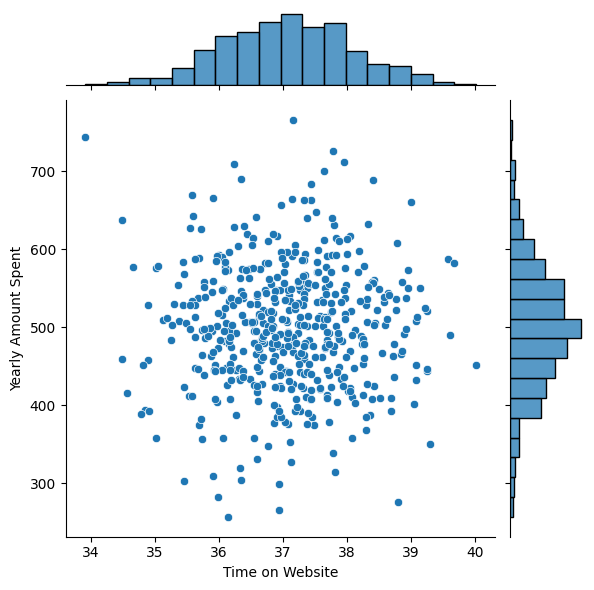

In [14]:
sns.jointplot(data = customers, x='Time on Website', y='Yearly Amount Spent')

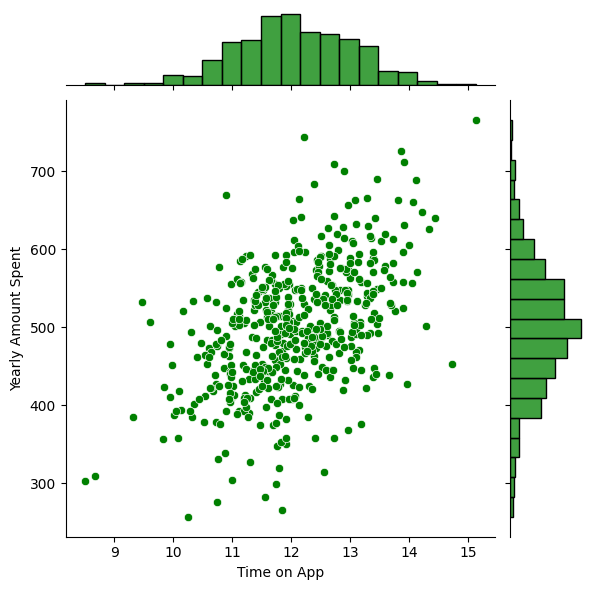

In [22]:
sns.jointplot(data = customers, x='Time on App', y='Yearly Amount Spent', color='green')
plt.savefig('jointplot.png')

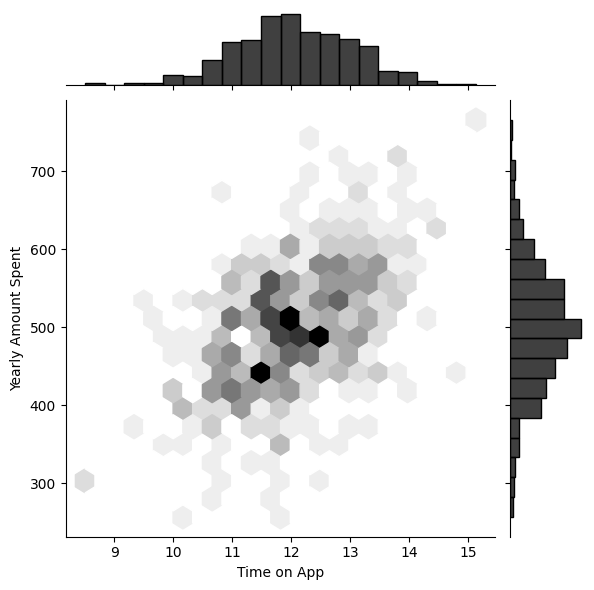

In [31]:
sns.jointplot(data = customers, x='Time on App', y='Yearly Amount Spent', color='black', kind='hex')
plt.savefig('jointplot2.png')

# The value for `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']

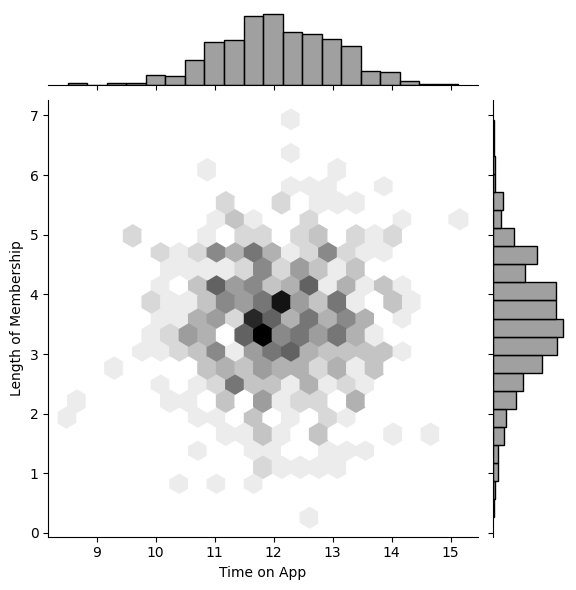

In [37]:
sns.jointplot(data = customers, x='Time on App', y='Length of Membership', color='grey',kind ='hex')
plt.savefig('jointplot.png')

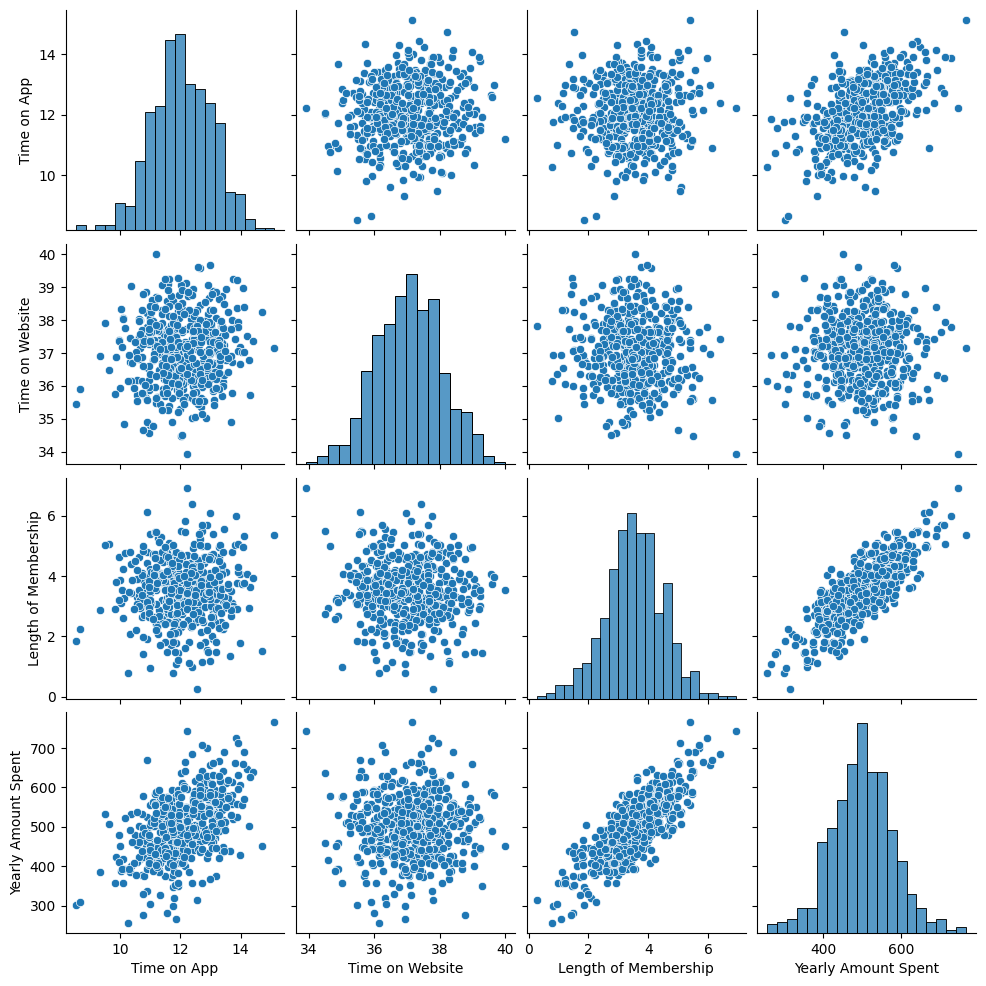

In [38]:
sns.pairplot(customers)

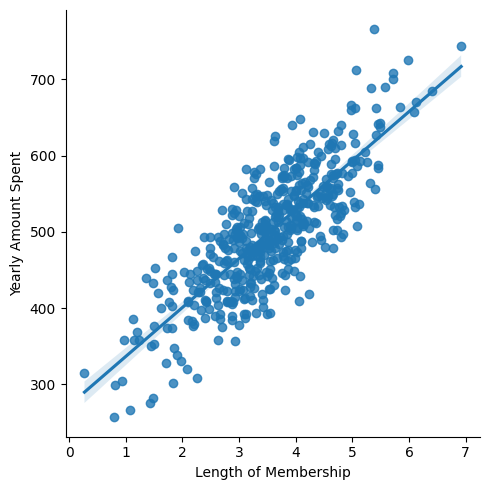

In [41]:
sns.lmplot(data = customers, x='Length of Membership', y='Yearly Amount Spent')

In [42]:
customers.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [46]:
y = customers['Yearly Amount Spent']
X = customers[['Time on App','Time on Website', 'Length of Membership']]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [51]:
lm.coef_

array([36.73506185,  1.06976162, 62.09959533])

In [54]:
prs = lm.predict(X_test)

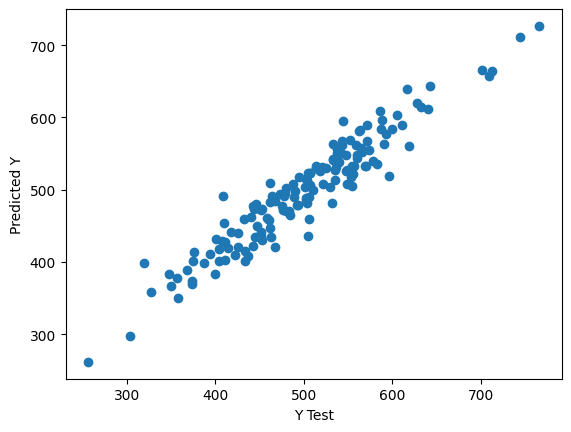

In [55]:
plt.scatter(y_test,prs)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig('scatter.png')

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prs))
print('MSE:', metrics.mean_squared_error(y_test, prs))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prs)))

MAE: 20.68662778076647
MSE: 678.3961717781165
RMSE: 26.046039464343067


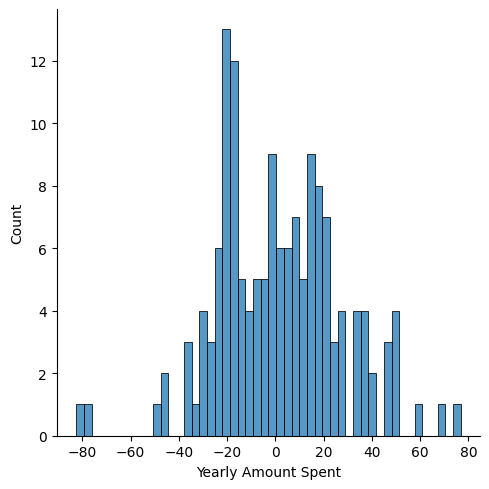

In [58]:
sns.displot((y_test - prs), bins=50)


In [59]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeffecient'])

,Coeffecient
Time on App,36.735062
Time on Website,1.069762
Length of Membership,62.099595


latex a2